C:\Users\adamy\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


----- Random Forest Classification Report -----
              precision    recall  f1-score   support

           0       0.97      0.63      0.76     12833
           1       0.67      0.97      0.79      9711

    accuracy                           0.78     22544
   macro avg       0.82      0.80      0.78     22544
weighted avg       0.84      0.78      0.77     22544

----- Decision Tree Classification Report -----
              precision    recall  f1-score   support

           0       0.97      0.65      0.77     12833
           1       0.67      0.97      0.80      9711

    accuracy                           0.79     22544
   macro avg       0.82      0.81      0.78     22544
weighted avg       0.84      0.79      0.78     22544

----- Logistic Regression Classification Report -----
              precision    recall  f1-score   support

           0       0.91      0.45      0.60     12833
           1       0.57      0.94      0.71      9711

    accuracy                    

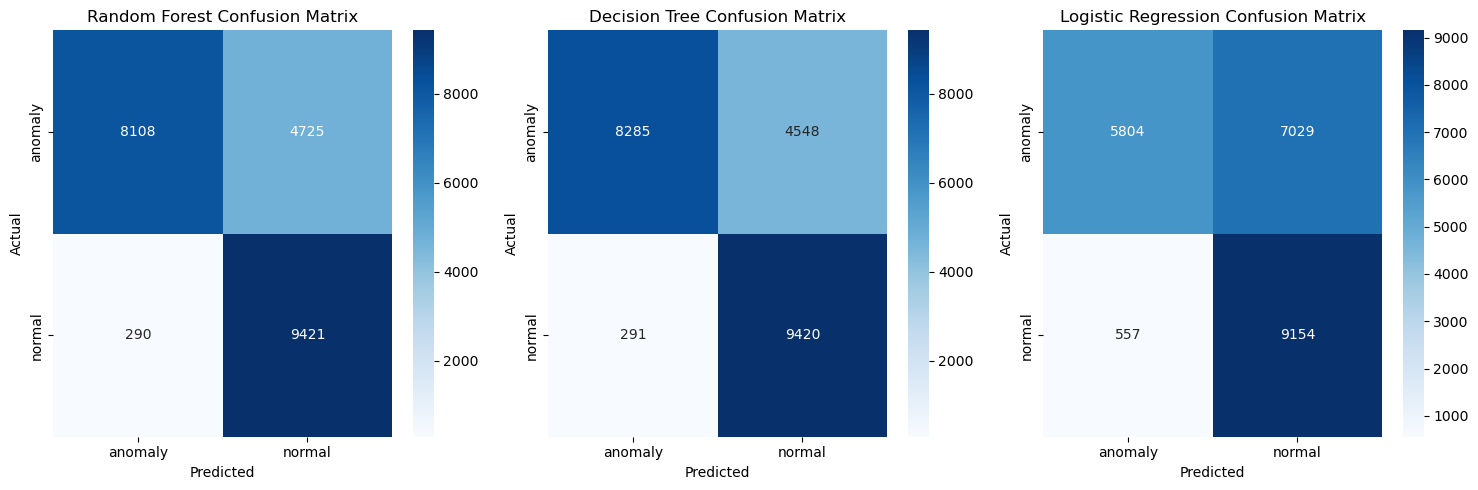

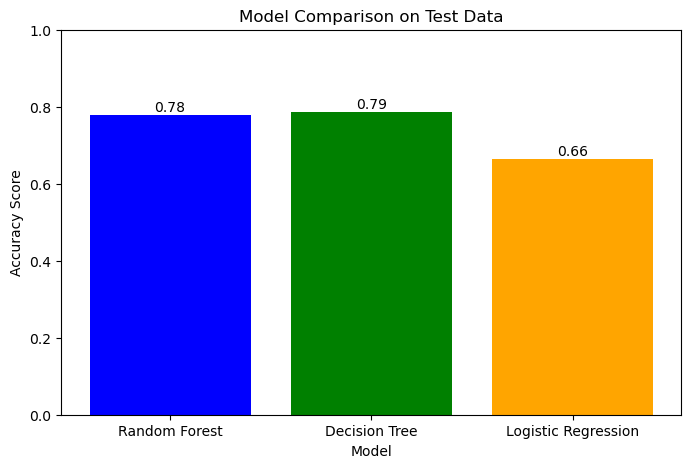

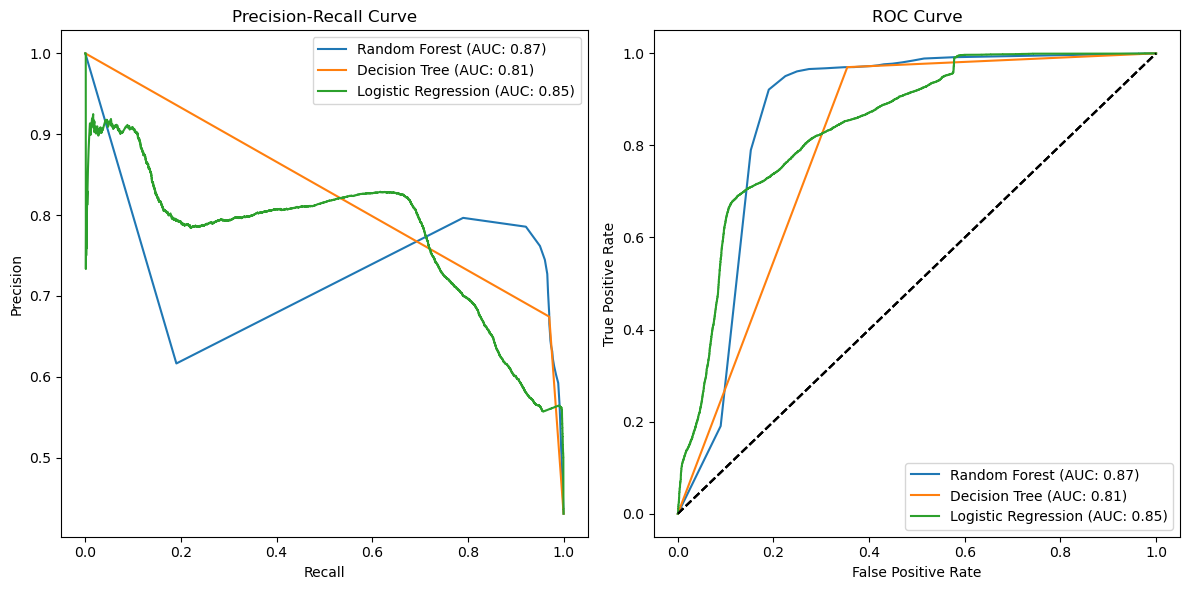

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_recall_curve,
    roc_curve,
    auc,
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
train_path = "C:\\Users\\adamy\\Downloads\\Train.csv"
test_path = "C:\\Users\\adamy\\Downloads\\Test.csv"

df = pd.read_csv(train_path)
df2 = pd.read_csv(test_path)

# Feature and label separation
x = df.drop(columns=["class"])
y = df["class"]
x1 = df2.drop(columns=["class"])
y1 = df2["class"]

# Encoding categorical data
labelencoder = LabelEncoder()
for column in x.columns:
    if x[column].dtype == object:
        x[column] = labelencoder.fit_transform(x[column])
for column in x1.columns:
    if x1[column].dtype == object:
        x1[column] = labelencoder.fit_transform(x1[column])

y = labelencoder.fit_transform(y)
y1 = labelencoder.fit_transform(y1)

# Initialize models
random_forest = RandomForestClassifier(n_estimators=20, random_state=0)
decision_tree = DecisionTreeClassifier(random_state=0)
logistic_regressor = LogisticRegression(random_state=0, max_iter=1000)

# Fit models
random_forest.fit(x, y)
decision_tree.fit(x, y)
logistic_regressor.fit(x, y)

# Predictions
rf_predictions = random_forest.predict(x1)
dt_predictions = decision_tree.predict(x1)
lr_predictions = logistic_regressor.predict(x1)

# Scores
rf_score = accuracy_score(y1, rf_predictions)
dt_score = accuracy_score(y1, dt_predictions)
lr_score = accuracy_score(y1, lr_predictions)

# Classification reports
print("----- Random Forest Classification Report -----")
print(classification_report(y1, rf_predictions))
print("----- Decision Tree Classification Report -----")
print(classification_report(y1, dt_predictions))
print("----- Logistic Regression Classification Report -----")
print(classification_report(y1, lr_predictions))

# Confusion matrices
plt.figure(figsize=(15, 5))
for i, (predictions, title) in enumerate(
    zip(
        [rf_predictions, dt_predictions, lr_predictions],
        ["Random Forest", "Decision Tree", "Logistic Regression"],
    )
):
    plt.subplot(1, 3, i + 1)
    cm = confusion_matrix(y1, predictions)
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=labelencoder.classes_,
        yticklabels=labelencoder.classes_,
    )
    plt.title(f"{title} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# Model comparison
models = ["Random Forest", "Decision Tree", "Logistic Regression"]
scores = [rf_score, dt_score, lr_score]

plt.figure(figsize=(8, 5))
plt.bar(models, scores, color=["blue", "green", "orange"])
plt.title("Model Comparison on Test Data")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
for i, v in enumerate(scores):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center")
plt.show()

# Precision-Recall Curve and ROC-AUC
plt.figure(figsize=(12, 6))

for i, (model, preds, title) in enumerate(
    zip(
        [random_forest, decision_tree, logistic_regressor],
        [rf_predictions, dt_predictions, lr_predictions],
        ["Random Forest", "Decision Tree", "Logistic Regression"],
    )
):
    precision, recall, _ = precision_recall_curve(y1, model.predict_proba(x1)[:, 1])
    fpr, tpr, _ = roc_curve(y1, model.predict_proba(x1)[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, label=f"{title} (AUC: {roc_auc:.2f})")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title("Precision-Recall Curve")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, label=f"{title} (AUC: {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], "k--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()

plt.tight_layout()
plt.show()
